In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rexpi

# Plot poles, interpolation nodes and equioscillation points
and re-use previously computed interpolation nodes

In [2]:
n = 12
tol = 1e-6

winit, _ = rexpi.west(n,tol)
wfin = (n+0.5)*np.pi
ws = np.linspace(winit,wfin,10)
nw = len(ws)
inodes = np.zeros((2*n+1,nw))
eopoints = np.zeros((2*n+2,nw))
aprxerr = np.zeros(nw)
polesreal = np.zeros((n,nw))
polesimag = np.zeros((n,nw))
nodes_pos = None
usetol=1e-3

print("   |n = %d"%n)
print(" j |    w  |  brib                     |")
print("   |       | iter| rel.devi | error    | err.est.")
for (ij,w) in zip(range(len(ws)),ws):
    rx, info = rexpi.brib(w = w, n = n, tolequi = 1e-3)
    success, accuracy, [nodes_pos, equnodes], allerr, tracknodes, nodesphis, timings = info
    errors1 = list(zip(*allerr))[0]
    deviations1 = list(zip(*allerr))[1]

    errestnow, _ = rexpi.errest(n,w)
    inodes[:n,ij] = nodes_pos
    eopoints[:n+1,ij] = equnodes
    aprxerr[ij] = errors1[-1]
    
    lams = rx.getpoles()
    ijxi = np.argsort(lams.imag)
    polesreal[:,ij], polesimag[:,ij] = lams.real[ijxi], lams.imag[ijxi]

    print("{:2d} |  {:4.1f} | {:3d} | {:.2e} | {:.2e} | {:.2e}".format(ij,w, len(allerr),deviations1[-1],errors1[-1], errestnow))

   |n = 12
 j |    w  |  brib                     |
   |       | iter| rel.devi | error    | err.est.
 0 |  20.6 |   6 | 3.61e-05 | 9.12e-07 | 1.00e-06
 1 |  22.7 |   6 | 3.87e-05 | 9.60e-06 | 1.05e-05
 2 |  24.7 |   6 | 1.82e-05 | 8.07e-05 | 9.25e-05
 3 |  26.8 |   5 | 1.54e-04 | 5.58e-04 | 6.51e-04
 4 |  28.9 |   5 | 4.98e-05 | 3.25e-03 | 3.77e-03
 5 |  31.0 |   6 | 5.84e-05 | 1.61e-02 | 1.85e-02
 6 |  33.0 |   6 | 1.12e-04 | 6.84e-02 | 7.74e-02
 7 |  35.1 |   6 | 6.87e-04 | 2.48e-01 | 2.69e-01
 8 |  37.2 |   9 | 9.99e-04 | 7.34e-01 | 7.59e-01
 9 |  39.3 |  29 | 8.37e-04 | 1.58e+00 | 1.78e+00


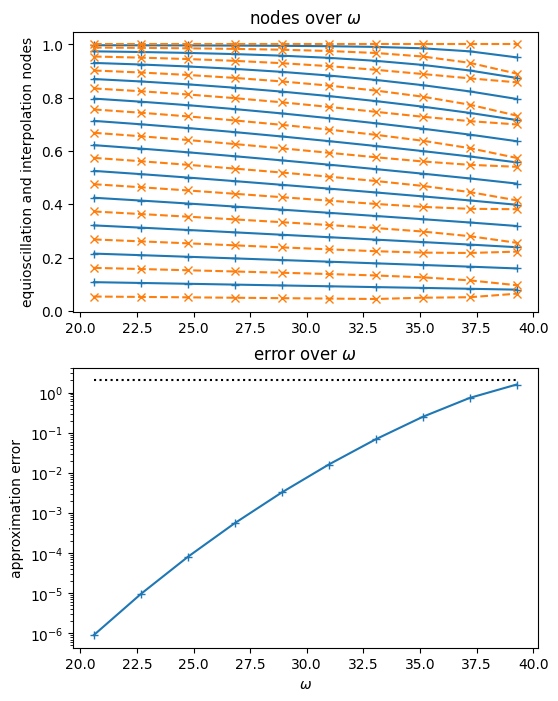

In [3]:
fig, axs = plt.subplots(2,1,figsize=(6,8))

# plot only positive interpolation nodes
for j in range(n):
    axs[0].plot(ws,inodes[j,:],'-+',markersize=6,color='C0')
for j in range(n+1):
    axs[0].plot(ws,eopoints[j,:],'--x',color='C1')
axs[0].title.set_text("nodes over $\omega$")
axs[0].set_ylabel("equioscillation and interpolation nodes")
axs[1].semilogy(ws,aprxerr,'-+')
axs[1].semilogy([ws[0],ws[-1]],[2,2],':k')
axs[1].title.set_text("error over $\omega$")
axs[1].set_ylabel("approximation error")
axs[1].set_xlabel("$\omega$");


plots poles for multiple values of w


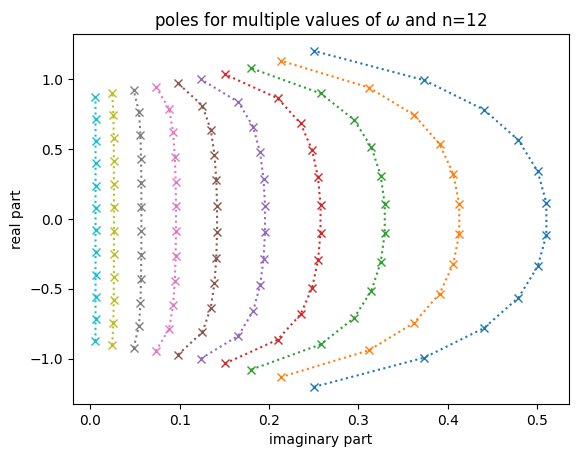

In [4]:
print("plots poles for multiple values of w")
for j in range(len(ws)):
    plt.plot(polesreal[:,j],polesimag[:,j],':x')
plt.title("poles for multiple values of $\omega$ and n={}".format(n))
plt.xlabel("imaginary part")
plt.ylabel("real part");


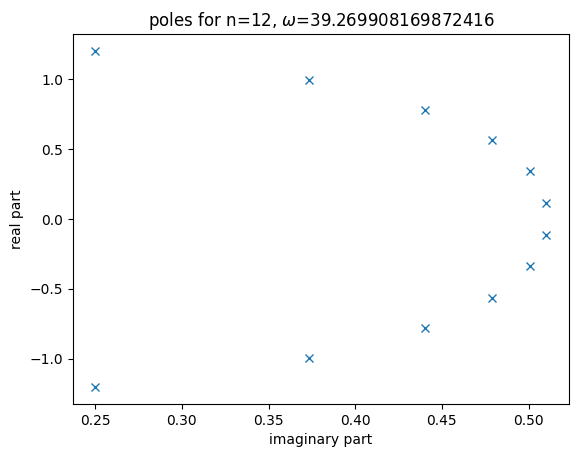

In [5]:
iw=0
plt.plot(polesreal[:,iw],polesimag[:,iw],'x');
plt.title("poles for n={}, $\omega$={}".format(n,w))
plt.xlabel("imaginary part")
plt.ylabel("real part");